In [1]:
%matplotlib inline

In [30]:
from itertools import product
from os.path import *
from os import *
import pickle
import sys

import numpy as np

sys.path.append(abspath('..'))
from retro.const import DC_STRS, DC_IC_STRS, DC_SUBDUST_DOMS, IC_SUBDUST_DOMS, I3_Z0_DEPTH

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')

In [6]:
from plotGoodies import removeBorder

In [7]:
!pwd

/home/justin/src/retro/notebooks


In [8]:
sys.path.append(abspath('..'))
from retro import load_pickle

In [12]:
gcd = load_pickle('../data/GeoCalibDetectorStatus_IC86.55697_corrected_V2.pkl')
geo = gcd['geo']

In [11]:
hexcoord0_rows_strings = [
    list(range(1, 7)),
    list(range(7, 14)),
    list(range(14, 22)),
    list(range(22, 31)),
    list(range(31, 41)),
    list(range(41, 51)),
    list(range(51, 60)),
    list(range(60, 68)),
    list(range(68, 75)),
    list(range(75, 79))
]
hexcoord1_rows_strings = [
    [1,7,14,22,31],
    [2,8,15,23,32,41],
    [3,9,16,24,33,42,51],
    [4,10,17,25,34,43,52,60],
    [5,11,18,26,35,44,53,61,68],
    [6,12,19,27,36,45,54,62,69,75],
    [13,20,28,37,46,55,63,70,76],
    [21,29,38,47,56,64,71,77],
    [30,39,48,57,65,72,78],
    [40,49,58,66,73],
    [50,59,67,74]
]
hexcoord2_rows_strings = [
    [31,41,51,60,68,75],
    [22,32,42,52,61,69,76],
    [14,23,33,43,53,62,70,77],
    [7,15,24,34,44,54,63,71,78],
    [1,8,16,25,35,45,55,64,72],
    [2,9,17,26,36,46,56,65,73],
    [3,10,18,27,37,47,57,66,74],
    [4,11,19,28,38,48,58,67],
    [5,12,20,29,39,49,59],
    [6,13,21,30,40,50]
]

hexcoord0_x = [[geo[s-1, 0, 0] for s in strings] for strings in hexcoord0_rows_strings]
hexcoord0_y = [[geo[s-1, 0, 1] for s in strings] for strings in hexcoord0_rows_strings]

hexcoord1_x = [[geo[s-1, 0, 0] for s in strings] for strings in hexcoord1_rows_strings]
hexcoord1_y = [[geo[s-1, 0, 1] for s in strings] for strings in hexcoord1_rows_strings]

hexcoord2_x = [[geo[s-1, 0, 0] for s in strings] for strings in hexcoord2_rows_strings]
hexcoord2_y = [[geo[s-1, 0, 1] for s in strings] for strings in hexcoord2_rows_strings]

np.array(zip(hexcoord0_x[0], hexcoord0_y[0]))

array([[-256.14001465, -521.08001709],
       [-132.80000305, -501.45001221],
       [  -9.13000011, -481.73999023],
       [ 114.38999939, -461.98999023],
       [ 237.77999878, -442.42001343],
       [ 361.        , -422.82998657]])

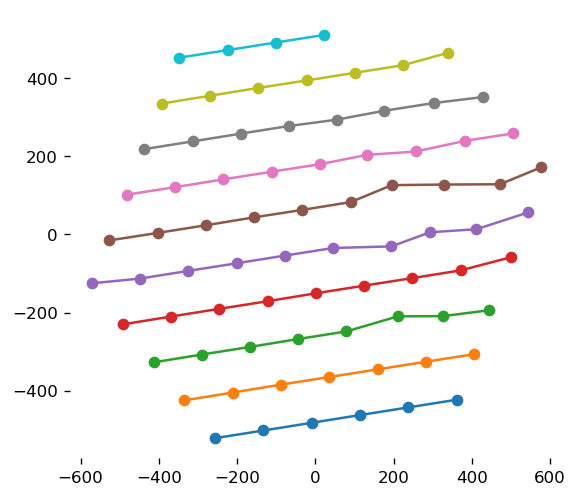

In [32]:
fig, ax = plt.subplots(dpi=120)
for row in range(len(hexcoord0_x)):
    ax.plot(hexcoord0_x[row], hexcoord0_y[row], 'o-')
ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

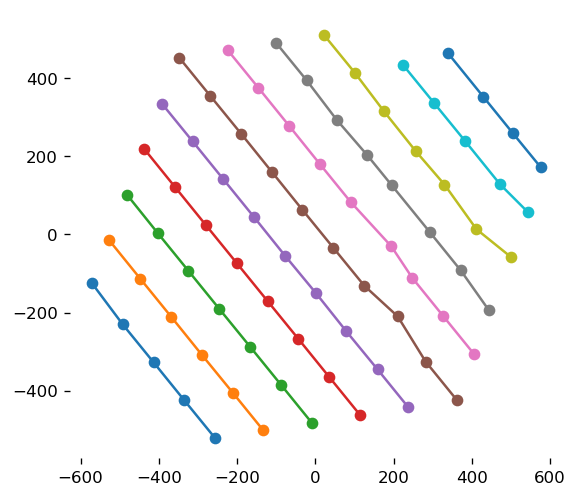

In [33]:
fig, ax = plt.subplots(dpi=120)
for row in range(len(hexcoord1_x)):
    ax.plot(hexcoord1_x[row], hexcoord1_y[row], 'o-')
ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

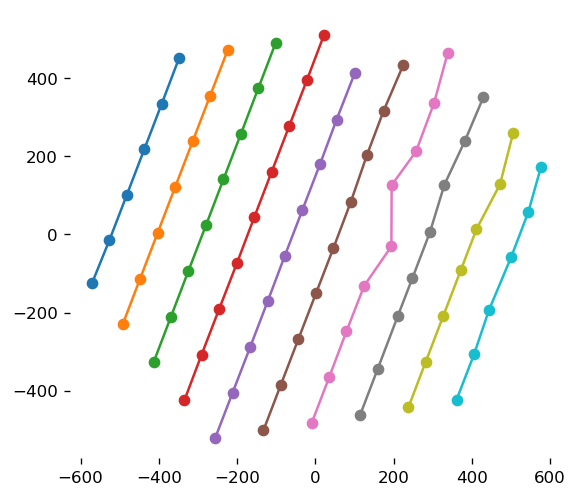

In [34]:
fig, ax = plt.subplots(dpi=120)
for row in range(len(hexcoord2_x)):
    ax.plot(hexcoord2_x[row], hexcoord2_y[row], 'o-')
ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

In [35]:
# Copyright (c) 2013, Robin Wilson
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
# * Redistributions of source code must retain the above copyright
# notice, this list of conditions and the following disclaimer.
# * Redistributions in binary form must reproduce the above copyright
# notice, this list of conditions and the following disclaimer in the
# documentation and/or other materials provided with the distribution.
# * Neither the name of Robin Wilson nor the
# names of its contributors may be used to endorse or promote products
# derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
# ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
# WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
# DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
# (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
# LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
# ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
# SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np


def func(p, x):
    """Basic linear regression 'model' for use with ODR"""
    return p[0] * x + p[1]


def orthoregress(x, y):
    """Perform an Orthogonal Distance Regression on the given data,
    using the same interface as the standard scipy.stats.linregress function.

    Arguments:
    x: x data
    y: y data

    Returns:
    [m, c, nan, nan, nan]

    Uses standard ordinary least squares to estimate the starting parameters
    then uses the scipy.odr interface to the ODRPACK Fortran code to do the
    orthogonal distance calculations.
    """
    linreg = linregress(x, y)
    mod = Model(func)
    dat = Data(x, y)
    od = ODR(dat, mod, beta0=linreg[0:2])
    out = od.run()

    return out.beta

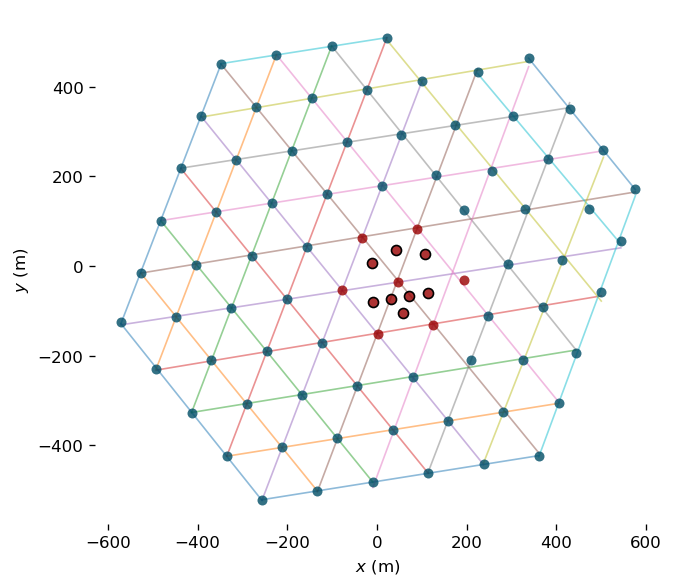

In [60]:
fig, ax = plt.subplots(figsize=(9, 5), dpi=120)

hexcoord0_params = []
hexcoord1_params = []
hexcoord2_params = []

lw = 1
alpha = 0.5

for row in range(len(hexcoord0_x)):
    x, y = hexcoord0_x[row], hexcoord0_y[row]
    m, b = orthoregress(x, y)
    hexcoord0_params.append((m, b))
    f = lambda x_: m*np.array(x_) + b
    c = 'C{}'.format(row % 10)
    ax.plot(x, f(x), '-', c=c, lw=lw, alpha=alpha)

for row in range(len(hexcoord1_x)):
    x, y = hexcoord1_x[row], hexcoord1_y[row]
    m, b = orthoregress(x, y)
    hexcoord1_params.append((m, b))
    f = lambda x_: m*np.array(x_) + b
    c = 'C{}'.format(row % 10)
    ax.plot(x, f(x), '-', c=c, lw=lw, alpha=alpha)

for row in range(len(hexcoord2_x)):
    x, y = hexcoord2_x[row], hexcoord2_y[row]
    m, b = orthoregress(x, y)
    hexcoord2_params.append((m, b))
    f = lambda x_: m*np.array(x_) + b
    c = 'C{}'.format(row % 10)
    ax.plot(x, f(x), '-', c=c, lw=lw, alpha=alpha)

alpha = 0.8
for s in range(1, 87):
    s_idx = s - 1
    x, y = geo[s_idx, 0, 0:2]
    mec = 'none' #[0.5]*3
    if s in dc_strings + dc_ext_strings:
        mfc = [0.6,0,0,alpha]
        if s in dc_strings:
            mec = [0,0,0]
    else:
        mfc = [0,0.3,0.4,alpha]
    ax.plot(x, y, 'o', mfc=mfc, mec=mec, mew=1)

hexcoord0_params = np.array(hexcoord0_params)
hexcoord1_params = np.array(hexcoord1_params)
hexcoord2_params = np.array(hexcoord2_params)

ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$y$ (m)')
fig.tight_layout()
pass

hexcoord0_m: 1.593272477001317e-01
hexcoord1_m: 1.232276522636381e+00
hexcoord2_m: 2.614813855806950e+00


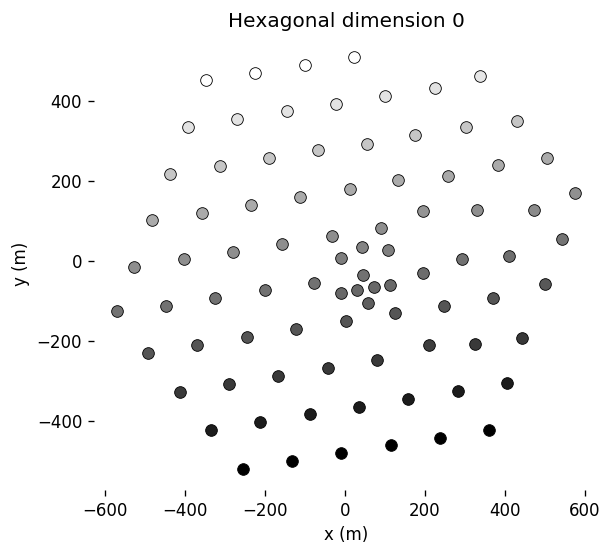

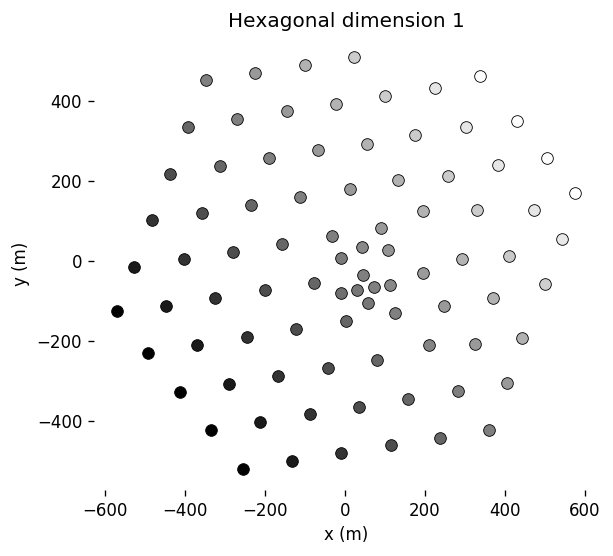

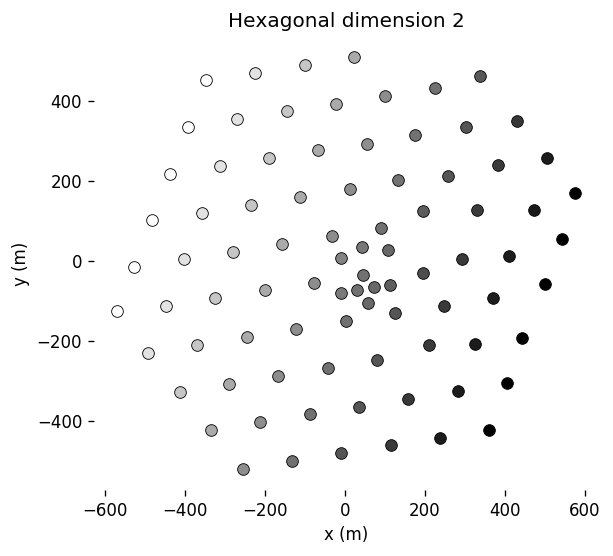

In [18]:
hexcoord0_m = np.median(hexcoord0_params[:, 0])
hexcoord1_m = -np.median(hexcoord1_params[:, 0])
hexcoord2_m = np.median(hexcoord2_params[:, 0])

print 'hexcoord0_m: {:.15e}'.format(hexcoord0_m)
print 'hexcoord1_m: {:.15e}'.format(hexcoord1_m)
print 'hexcoord2_m: {:.15e}'.format(hexcoord2_m)

get_hc0_coord = lambda x, y: y/hexcoord0_m - x
get_hc1_coord = lambda x, y: y/hexcoord1_m + x
get_hc2_coord = lambda x, y: y/hexcoord2_m - x

hc0 = get_hc0_coord(geo[:, 0, 0], geo[:, 0, 1])
hc1 = get_hc1_coord(geo[:, 0, 0], geo[:, 0, 1])
hc2 = get_hc2_coord(geo[:, 0, 0], geo[:, 0, 1])

hc0_range = hc0.max() - hc0.min()
hc1_range = hc1.max() - hc1.min()
hc2_range = hc2.max() - hc2.min()

for cnum, hc in enumerate([hc0, hc1, hc2]):
    fig, ax = plt.subplots(figsize=(9, 5), dpi=120)
    ax.set_title('Hexagonal dimension {}'.format(cnum))

    for s_idx in range(86):
        x, y = geo[s_idx, 0, 0:2]
        c = ((hc[s_idx] - hc.min())/(hc.max() - hc.min()),)*3
        ax.plot(x, y, 'o', mfc=c, mec='k', mew=0.5, ms=7)

    ax.axis('image')
    removeBorder(ax, left=False, bottom=False)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
pass

# Find DOMs to exclude that might be inside dust layer

In [47]:
icelayer_z = np.array([-155, 85])
icelayer_depth = I3_Z0_DEPTH - icelayer_z
print(icelayer_depth)

[2103.07 1863.07]


In [48]:
all_dom_z = np.sort(np.unique(geo[:, :, 2].flatten()))
all_dom_depth = I3_Z0_DEPTH - all_dom_z
all_dom_depth.min(), all_dom_depth.max()

(1423.5100024414062, 2460.8900073242185)

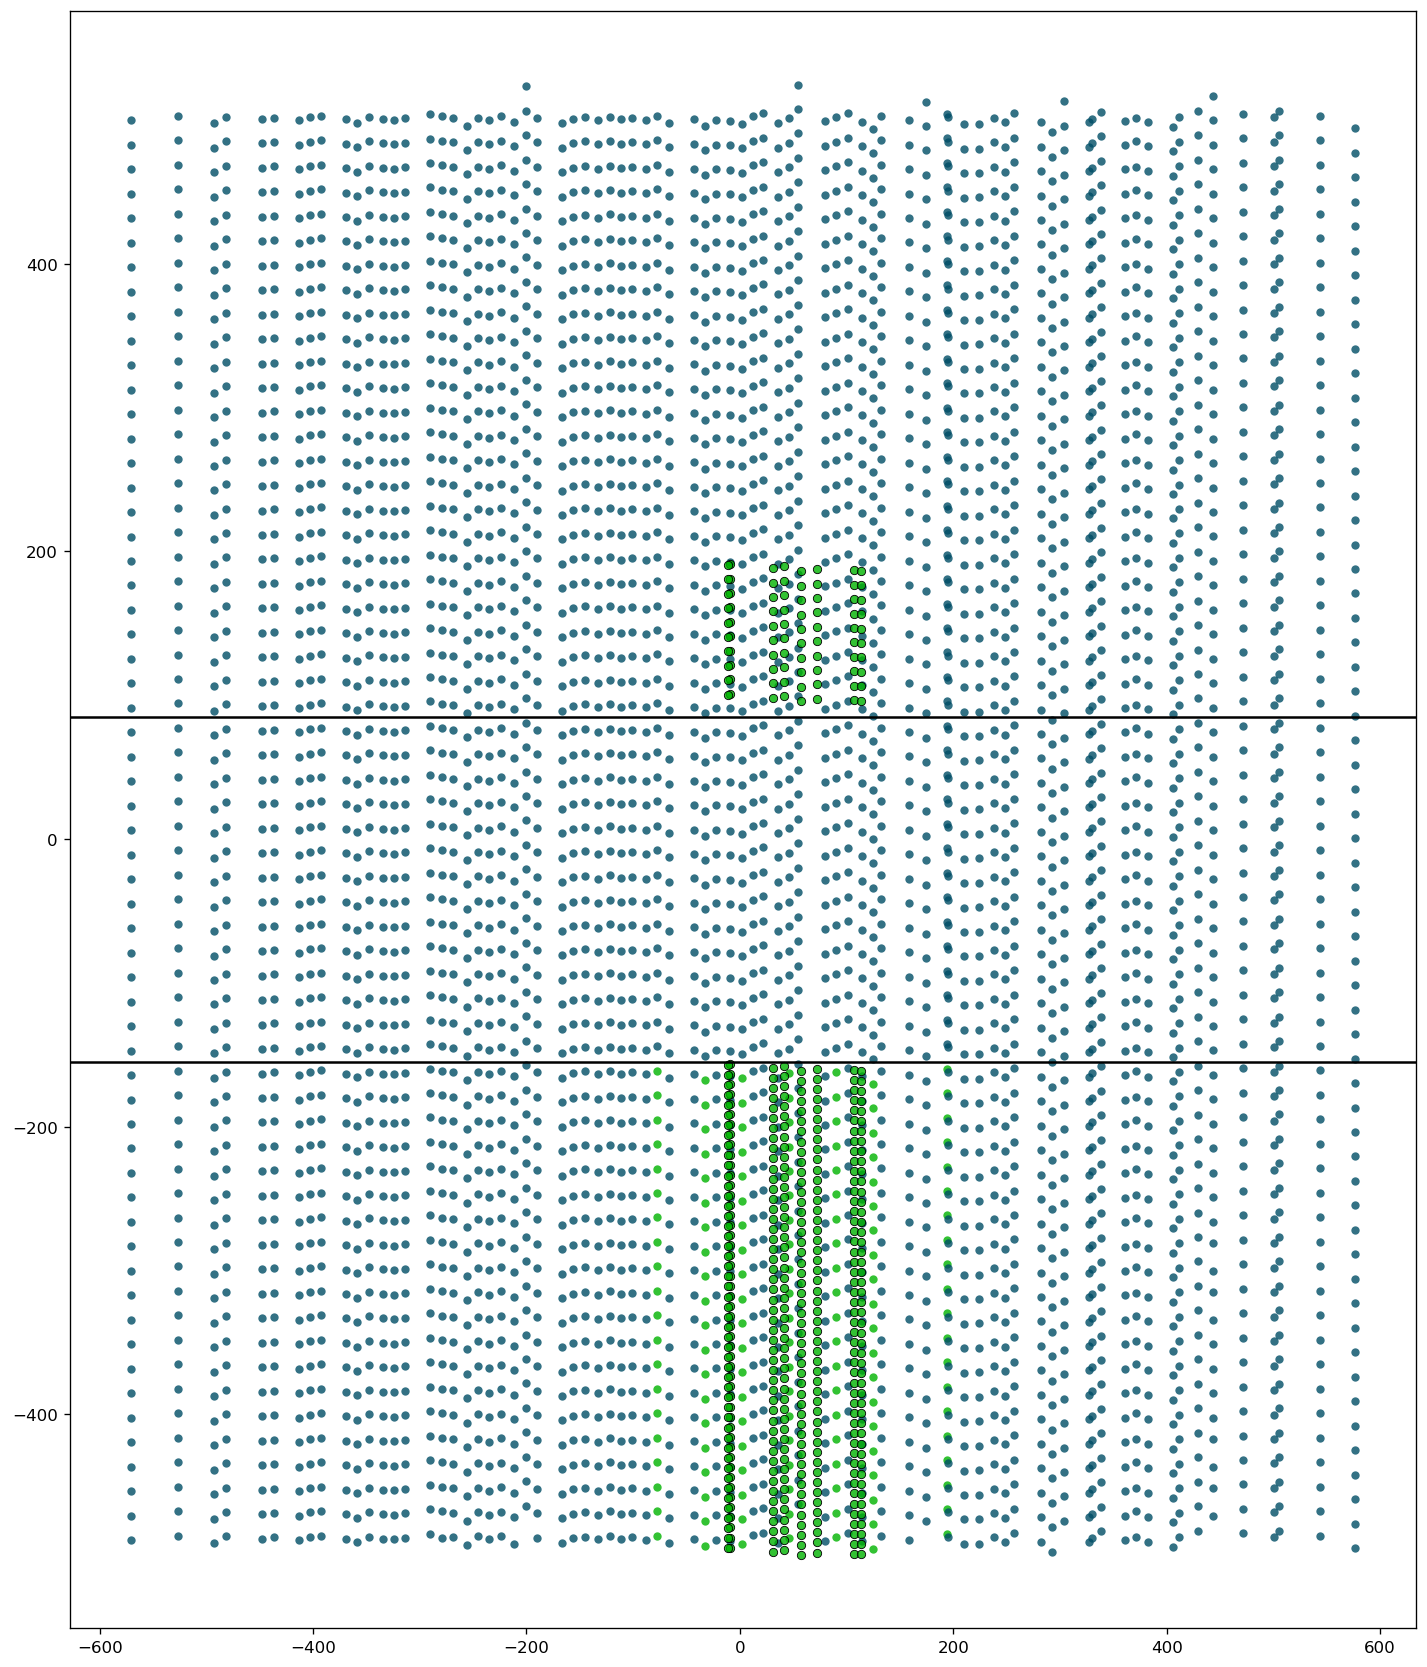

In [49]:
%%time

alpha = 0.8
mfc_dc = [0.0, 0.7, 0.0, alpha]
mfc_ic = [0.0, 0.3, 0.4, alpha]
mec_dc = [0]*3
mec_ic = 'none'

fig, ax = plt.subplots(figsize=(12, 14), dpi=120)
for string in range(1, 86 + 1):
    s_idx = string - 1

    x, y = geo[s_idx, 0, :2]
    mec = mec_dc if string in DC_STRS else mec_ic

    for om in range(1, 60):
        d_idx = om - 1
        z = geo[s_idx, d_idx, 2]
        ax.plot(
            x, z, 'o',
            ms=5,
            mfc=mfc_dc if (string in DC_STRS or (string in DC_IC_STRS and z < icelayer_z.min())) else mfc_ic,
            mec=mec,
            mew=0.5,
        )

# Draw lines for what I'm calling dust layer
xlim = ax.get_xlim()
ax.plot(xlim, [icelayer_z.min()]*2, 'k-')
ax.plot(xlim, [icelayer_z.max()]*2, 'k-')
ax.set_xlim(xlim)

fig.tight_layout()